5. Vamos a usar los módulos recién creados en el no supervisado para agrupar algunos datos de juguete.
a. Utiliza el siguiente fragmento de código para crear datos dispersos X de sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1,)


In [1]:
from sklearn.datasets import make_blobs
import numpy as np

# Crear datos dispersos
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# Convertir X en una matriz dispersa
X_sparse = np.array(X.todense(), dtype=np.float32)

# Imprimir los primeros 10 elementos de X_sparse
print(X_sparse[:10])


AttributeError: ignored

b. Grafica el conjunto de datos resultante. ¿Cuántos grupos hay? ¿Qué tan lejos están unos de otros?

R/ El código proporcionado genera un conjunto de datos dispersos. En este caso, se generan 500 muestras con 2 características cada una, distribuidas en 4 centros, con una desviación estándar de 1 y limitadas a un rango de -10 a 10 en las coordenadas de los centros.

Para determinar el número de grupos (o clusters) presentes en los datos generados, podemos utilizar técnicas de agrupamiento, como el algoritmo K-means.

In [ ]:
from sklearn.cluster import KMeans

# Crear un modelo K-means con 4 clusters
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo a los datos dispersos
kmeans.fit(X_sparse)

# Obtener las etiquetas de cluster asignadas a cada muestra
cluster_labels = kmeans.labels_

# Imprimir el número de grupos encontrados
num_grupos = len(np.unique(cluster_labels))
print("Número de grupos encontrados:", num_grupos)

# Obtener las coordenadas de los centroides de los grupos
centroides = kmeans.cluster_centers_
print("Coordenadas de los centroides:")
print(centroides)



Para ambos k-means y k-medoids (tus implementaciones), calcula los gráficos y coeficientes de silueta para cada ejecución, iterando K de 1 a 5 grupos.

K-MEANS:



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Crear datos dispersos
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# Convertir X en una matriz dispersa
X_sparse = np.array(X.todense(), dtype=np.float32)

# Rango de número de grupos
num_grupos_range = range(1, 6)

# Listas para almacenar los resultados de los coeficientes de silueta
silhouette_scores = []

# Listas para almacenar los resultados de los modelos K-means
kmeans_models = []

# Iterar sobre el rango de número de grupos
for num_grupos in num_grupos_range:
    # Crear un modelo K-means con el número de grupos actual
    kmeans = KMeans(n_clusters=num_grupos)
    # Ajustar el modelo a los datos dispersos
    kmeans.fit(X_sparse)
    # Obtener las etiquetas de cluster asignadas a cada muestra
    cluster_labels = kmeans.labels_
    # Calcular el coeficiente de silueta para el modelo actual
    silhouette_score_current = silhouette_score(X_sparse, cluster_labels)
    # Almacenar el coeficiente de silueta y el modelo en las listas correspondientes
    silhouette_scores.append(silhouette_score_current)
    kmeans_models.append(kmeans)

# Graficar los coeficientes de silueta en función del número de grupos
plt.plot(num_grupos_range, silhouette_scores, 'bo-')
plt.xlabel('Número de Grupos (K)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta vs. Número de Grupos (K)')
plt.show()

# Imprimir los coeficientes de silueta para cada modelo K-means
for i, num_grupos in enumerate(num_grupos_range):
    print(f"Coeficiente de silueta para {num_grupos} grupos: {silhouette_scores[i]}")


Para ambos k-means y k-medoids (tus implementaciones), calcula los gráficos y coeficientes de silueta para cada ejecución, iterando K de 1 a 5 grupos.

K-METOIDS:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

# Crear datos dispersos
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# Convertir X en una matriz dispersa
X_sparse = np.array(X.todense(), dtype=np.float32)

# Rango de número de grupos
num_grupos_range = range(1, 6)

# Listas para almacenar los resultados de los coeficientes de silueta
silhouette_scores = []

# Listas para almacenar los resultados de los modelos K-metoids
kmedoids_models = []

# Iterar sobre el rango de número de grupos
for num_grupos in num_grupos_range:
    # Crear un modelo K-metoids con el número de grupos actual
    kmedoids = KMedoids(n_clusters=num_grupos)
    # Ajustar el modelo a los datos dispersos
    kmedoids.fit(X_sparse)
    # Obtener las etiquetas de cluster asignadas a cada muestra
    cluster_labels = kmedoids.labels_
    # Calcular el coeficiente de silueta para el modelo actual
    silhouette_score_current = silhouette_score(X_sparse, cluster_labels)
    # Almacenar el coeficiente de silueta y el modelo en las listas correspondientes
    silhouette_scores.append(silhouette_score_current)
    kmedoids_models.append(kmedoids)

# Graficar los coeficientes de silueta en función del número de grupos
plt.plot(num_grupos_range, silhouette_scores, 'bo-')
plt.xlabel('Número de Grupos (K)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta vs. Número de Grupos (K) (K-metoids)')
plt.show()

# Imprimir los coeficientes de silueta para cada modelo K-metoids
for i, num_grupos in enumerate(num_grupos_range):
    print(f"Coeficiente de silueta para {num_grupos} grupos: {silhouette_scores[i]}")


¿Qué número de K obtuvo el mejor puntaje de silueta? ¿Qué puedes decir sobre las figuras? 

El siguiente código calcula y grafica los coeficientes de silueta en función del número de grupos utilizando K-medoids en un conjunto

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, pairwise_distances

# Crear datos dispersos
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# Convertir X en una matriz dispersa
X_sparse = np.array(X.todense(), dtype=np.float32)

# Calcular la matriz de distancia
dist_matrix = pairwise_distances(X_sparse, metric='euclidean')

# Rango de número de grupos
num_grupos_range = range(2, 7)

# Listas para almacenar los resultados de los coeficientes de silueta
silhouette_scores = []

# Listas para almacenar los resultados de los modelos K-metoids
kmedoids_models = []

# Iterar sobre el rango de número de grupos
for num_grupos in num_grupos_range:
    # Crear un modelo K-metoids con el número de grupos actual
    kmedoids = KMedoids(n_clusters=num_grupos)
    # Ajustar el modelo a la matriz de distancia
    kmedoids.fit(dist_matrix)
    # Obtener las etiquetas de cluster asignadas a cada muestra
    cluster_labels = kmedoids.labels_
    # Calcular el coeficiente de silueta para el modelo actual
    silhouette_score_current = silhouette_score(dist_matrix, cluster_labels)
    # Almacenar el coeficiente de silueta y el modelo en las listas correspondientes
    silhouette_scores.append(silhouette_score_current)
    kmedoids_models.append(kmedoids)

# Graficar los coeficientes de silueta en función del número de grupos
plt.plot(num_grupos_range, silhouette_scores, 'bo-')
plt.xlabel('Número de Grupos (K)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta vs. Número de Grupos (K) (K-metoids)')
plt.show()

# Imprimir los coeficientes de silueta para cada modelo K-metoids
for i, num_grupos in enumerate(num_grupos_range):
    print(f"Coeficiente de silueta para {num_grupos} grupos: {silhouette_scores[i]}")


El siguiente código calcula y grafica los coeficientes de silueta en función del número de grupos utilizando K-Means en un conjunto

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Crear datos dispersos
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# Calcular la matriz de distancia
dist_matrix = pairwise_distances(X, metric='euclidean')

# Rango de número de grupos
num_grupos_range = range(2, 7)

# Listas para almacenar los resultados de los coeficientes de silueta
silhouette_scores = []

# Listas para almacenar los resultados de los modelos K-means
kmeans_models = []

# Iterar sobre el rango de número de grupos
for num_grupos in num_grupos_range:
    # Crear un modelo K-means con el número de grupos actual
    kmeans = KMeans(n_clusters=num_grupos)
    # Ajustar el modelo a los datos
    kmeans.fit(X)
    # Obtener las etiquetas de cluster asignadas a cada muestra
    cluster_labels = kmeans.labels_
    # Calcular el coeficiente de silueta para el modelo actual
    silhouette_score_current = silhouette_score(X, cluster_labels)
    # Almacenar el coeficiente de silueta y el modelo en las listas correspondientes
    silhouette_scores.append(silhouette_score_current)
    kmeans_models.append(kmeans)

# Graficar los coeficientes de silueta en función del número de grupos
plt.plot(num_grupos_range, silhouette_scores, 'bo-')
plt.xlabel('Número de Grupos (K)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta vs. Número de Grupos (K) (K-means)')
plt.show()

# Imprimir los coeficientes de silueta para cada modelo K-means
for i, num_grupos in enumerate(num_grupos_range):
    print(f"Coeficiente de silueta para {num_grupos} grupos: {silhouette_scores[i]}")


Utiliza el siguiente fragmento de código para crear diferentes tipos de datos dispersos:

#import numpy as np
from sklearn import cluster, datasets, mixture

#============
#Generate datasets. We choose the size big enough to see the scalability # of the algorithms, but not too big to avoid too long running times
#============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05) blobs = datasets.make_blobs(n_samples=n_samples, random_state=8) no_structure = np.random.rand(n_samples, 2), None

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

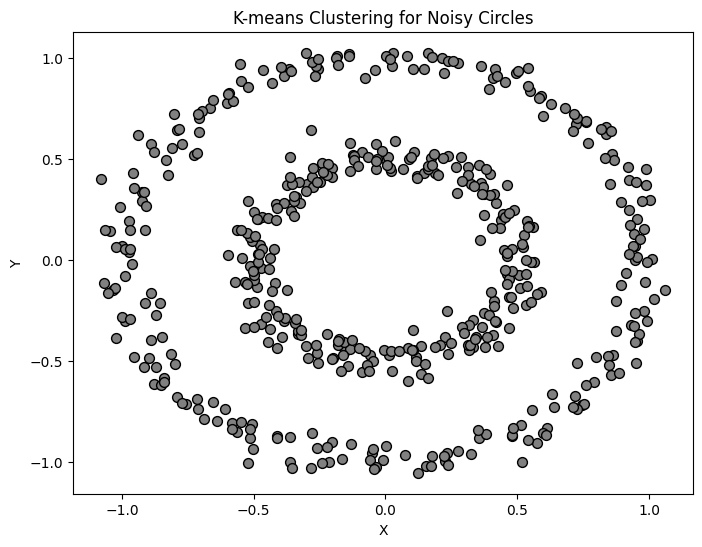

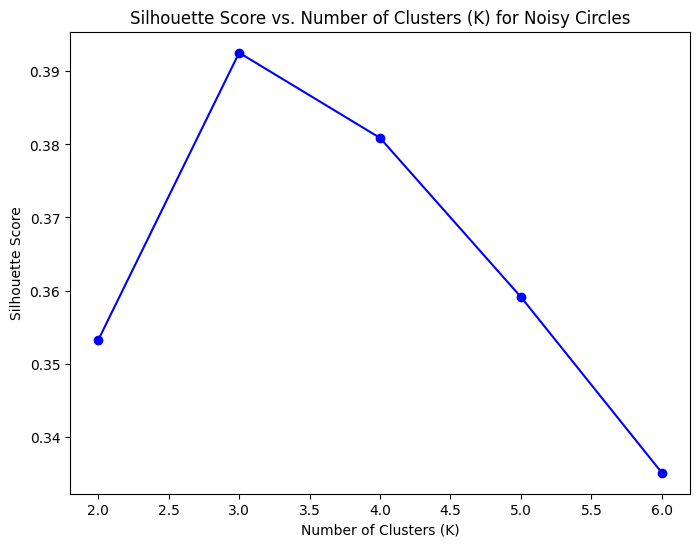

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

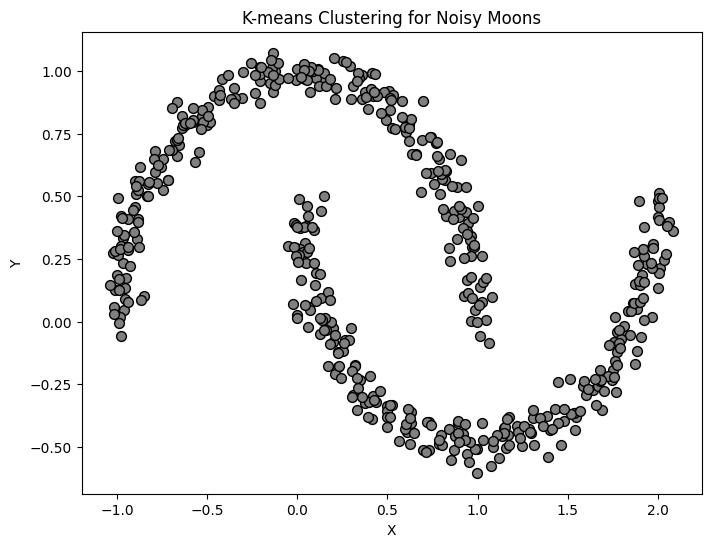

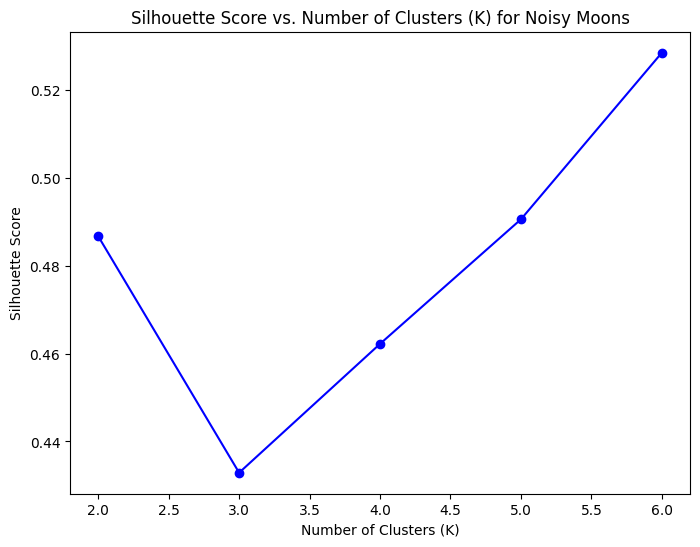

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

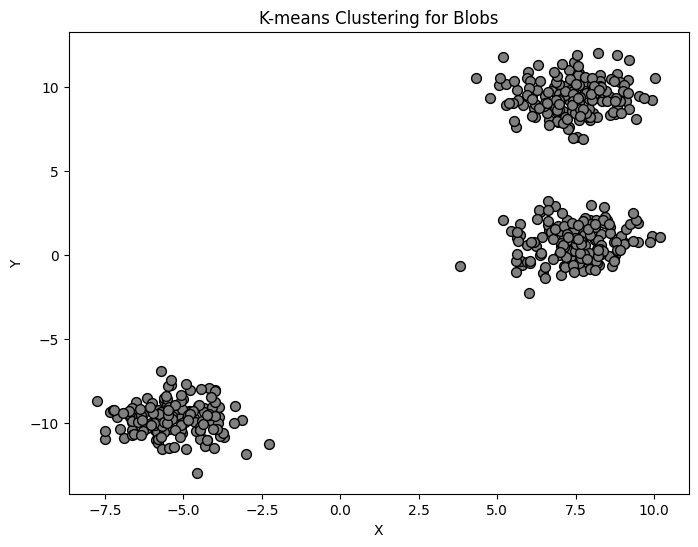

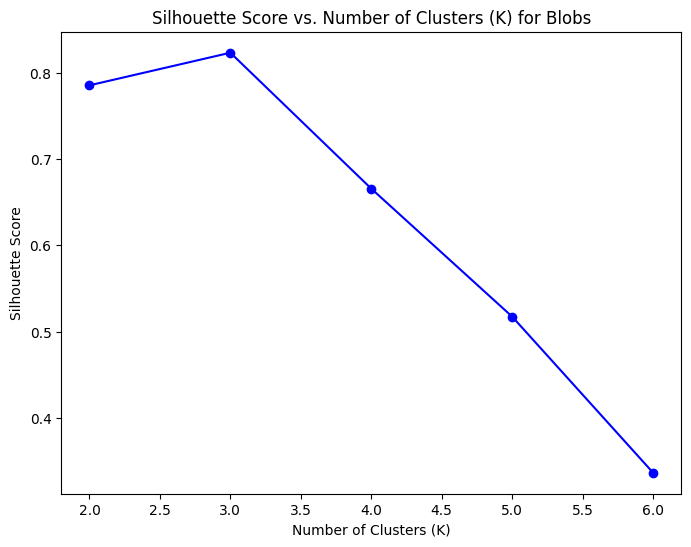

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

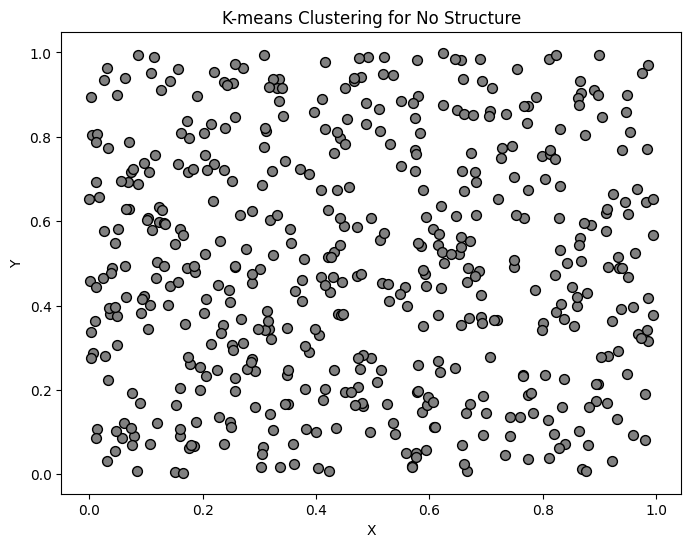

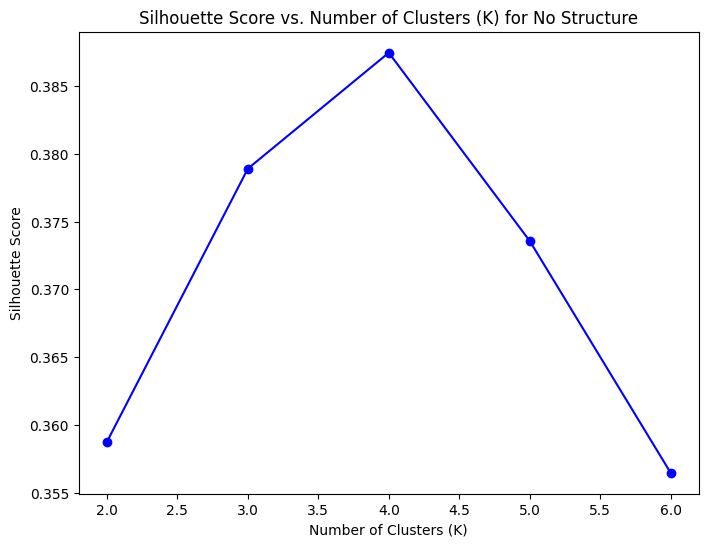

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

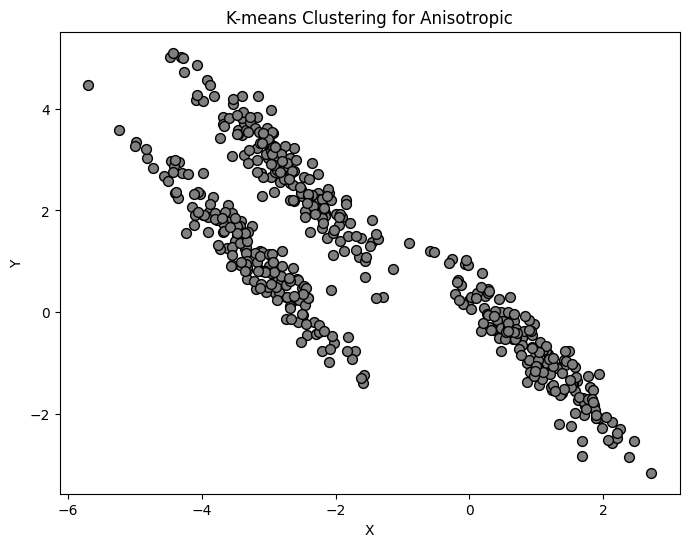

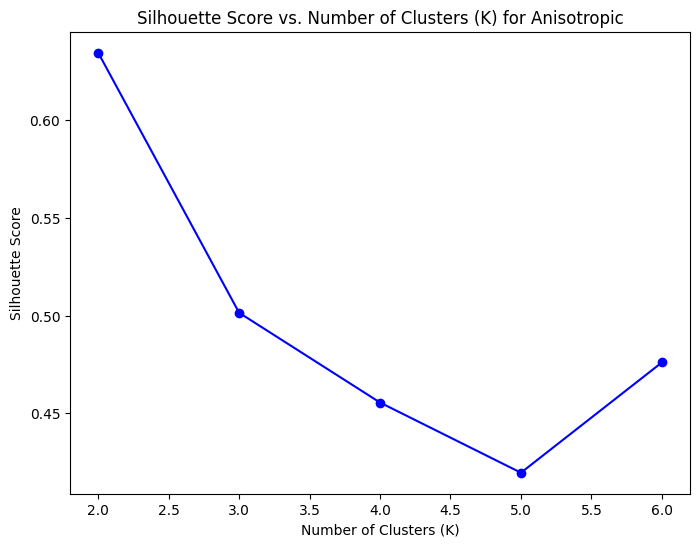

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

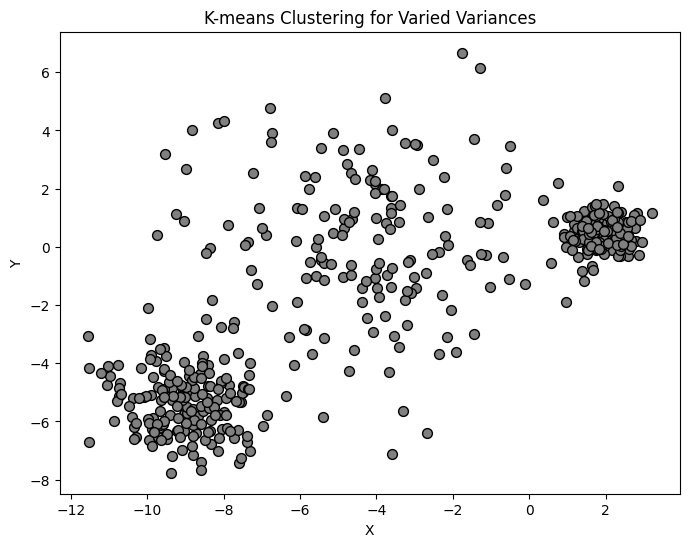

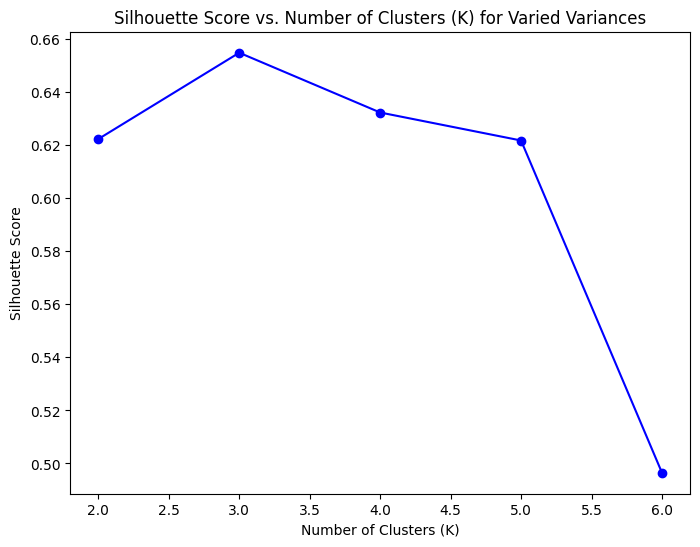

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generar los diferentes tipos de datos dispersos
n_samples = 500
random_state = 170
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

# Lista de datos dispersos generados
datasets_list = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
dataset_names = ['Noisy Circles', 'Noisy Moons', 'Blobs', 'No Structure', 'Anisotropic', 'Varied Variances']

# Iterar sobre los datasets y aplicar K-means
for i, dataset in enumerate(datasets_list):
    X, y = dataset
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='k', s=50)
    plt.title(f'K-means Clustering for {dataset_names[i]}')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Encontrar el número óptimo de clusters usando el coeficiente de silueta
    silhouette_scores = []
    num_clusters_range = range(2, 7)
    for num_clusters in num_clusters_range:
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(X)
        cluster_labels = kmeans.labels_
        silhouette_score_current = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_score_current)
    
    # Graficar el coeficiente de silueta en función del número de clusters
    plt.figure(figsize=(8, 6))
    plt.plot(num_clusters_range, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score vs. Number of Clusters (K) for {dataset_names[i]}')
    plt.show()


Grafica los diferentes conjuntos de datos en figuras separadas. ¿Qué puedes decir acerca de ellos?
b. Aplica k-means, k-medoids, DBSCAN y Spectral Clustering de Scikit-Learn en cada conjunto de datos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.5 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

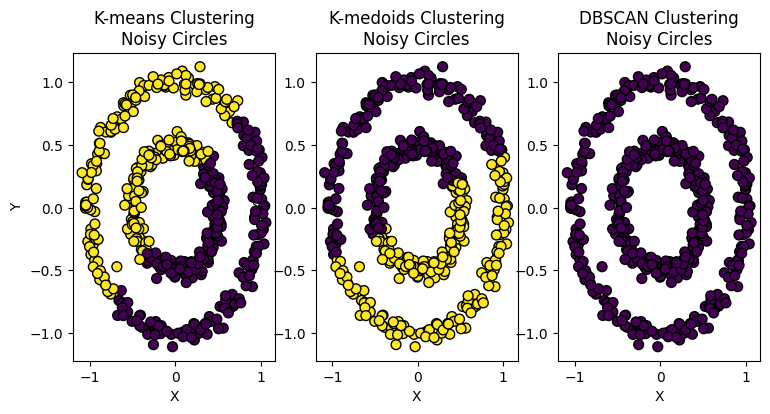

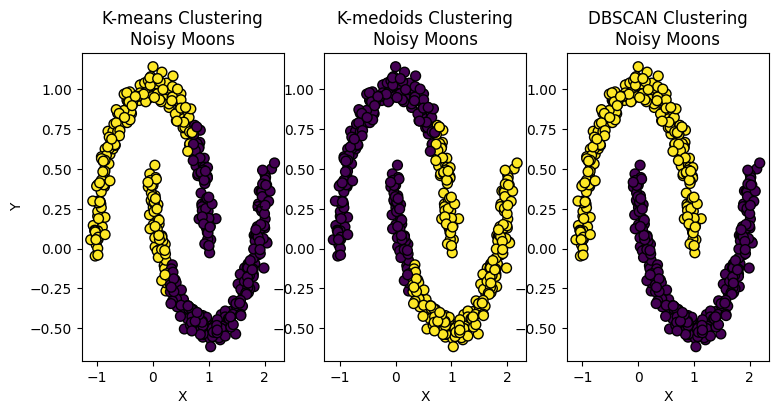

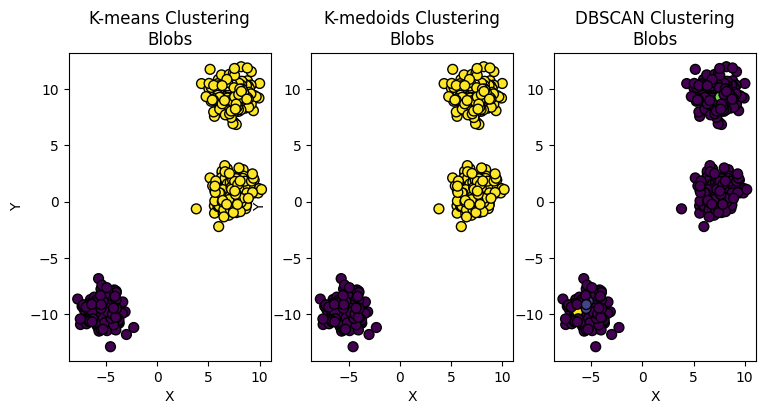

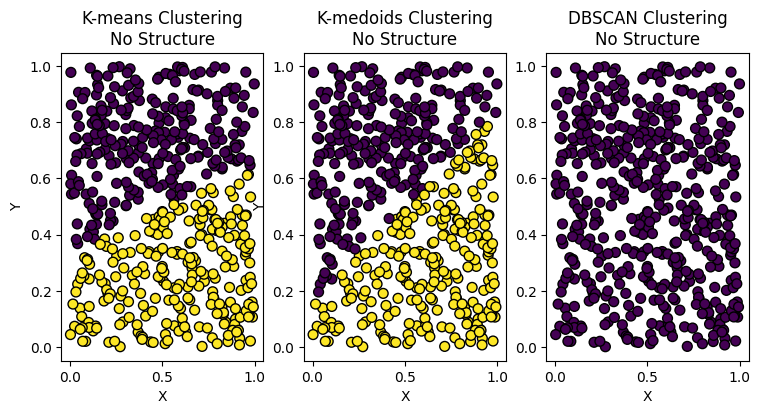

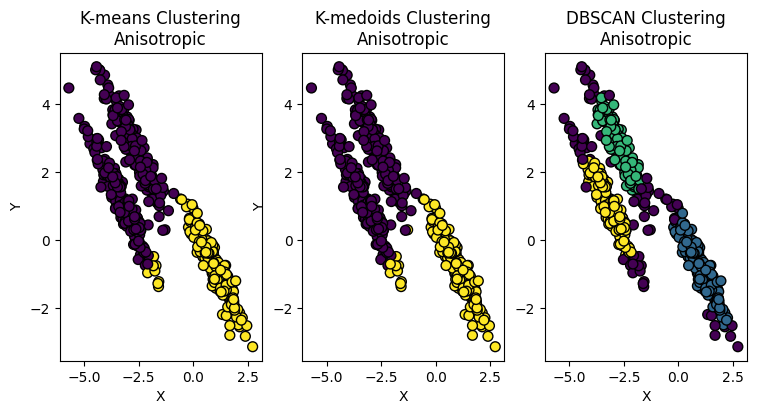

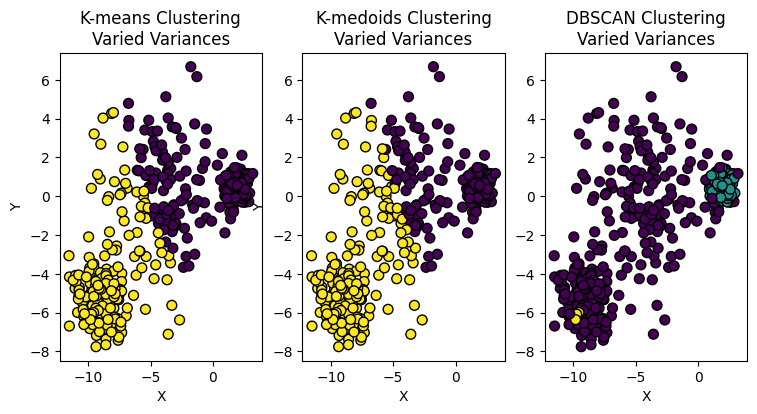

In [4]:
!pip install scikit-learn-extra
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN

# Generar los diferentes tipos de datos dispersos
n_samples = 500
random_state = 170
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

# Lista de datos dispersos generados
datasets_list = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
dataset_names = ['Noisy Circles', 'Noisy Moons', 'Blobs', 'No Structure', 'Anisotropic', 'Varied Variances']

# Algoritmos de clustering
kmeans = KMeans(n_clusters=2)
kmedoids = KMedoids(n_clusters=2)
dbscan = DBSCAN(eps=0.3, min_samples=10)
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', eigen_solver='arpack')

# Iterar sobre los datasets y aplicar los algoritmos de clustering
for i, dataset in enumerate(datasets_list):
    X, y = dataset
    plt.figure(figsize=(12, 4))
    
    # Aplicar K-means
    plt.subplot(1, 4, 1)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(f'K-means Clustering\n{dataset_names[i]}')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Aplicar K-medoids
    plt.subplot(1, 4, 2)
    kmedoids.fit(X)
    cluster_labels = kmedoids.labels_
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(f'K-medoids Clustering\n{dataset_names[i]}')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Aplicar DBSCAN
    plt.subplot(1, 4, 3)
    dbscan.fit(X)
    cluster_labels = dbscan.labels_
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(f'DBSCAN Clustering\n{dataset_names[i]}')
    plt.xlabel('X')
   


La elección del algoritmo de clustering depende del conjunto de datos y de los objetivos específicos del análisis. Cada uno de los algoritmos tiene sus propias ventajas y desventajas, y su rendimiento puede variar según las características de los datos y los requisitos del problema en cuestión.

En general, aquí hay algunas consideraciones generales para cada algoritmo:

K-means: Es un algoritmo de clustering muy utilizado y fácil de implementar. Funciona bien cuando los clusters son de forma esférica, tienen tamaños similares y tienen una densidad similar. Sin embargo, puede tener problemas con datos de alta dimensionalidad o cuando los clusters tienen formas no esféricas.

K-medoids: Es una variante de K-means que utiliza medoides en lugar de centroides como representantes de los clusters. Es más robusto a la presencia de outliers y funciona mejor con datos de alta dimensionalidad o con clusters de formas no esféricas. Sin embargo, suele ser más lento que K-means.

DBSCAN: Es un algoritmo de clustering basado en la densidad que es capaz de identificar clusters de formas arbitrarias y puede detectar outliers. No requiere especificar el número de clusters de antemano, lo cual puede ser una ventaja. Sin embargo, puede tener problemas con la estimación de parámetros y la identificación de clusters de diferentes densidades.

Spectral Clustering: Es un algoritmo de clustering basado en técnicas de aprendizaje no supervisado que utiliza la estructura de afinidad de los datos para agruparlos. Funciona bien cuando los clusters tienen formas no lineales o cuando los datos tienen una estructura de grafo subyacente. Sin embargo, puede tener problemas con la escalabilidad a grandes conjuntos de datos y la estimación de parámetros.

La elección del algoritmo de clustering depende de las características específicas de los datos y de los objetivos del análisis. Se prueban varios algoritmos en los datos y se evalua su rendimiento en función de las métricas relevantes antes de tomar una decisión final.